In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

In [6]:
X , y = make_moons(n_samples=200, noise=0.09, random_state=42)

In [8]:
X

array([[-1.04367864e+00,  8.86576137e-02],
       [ 9.19419335e-01,  4.57562308e-01],
       [ 6.49113625e-01,  7.11094620e-01],
       [ 1.19669356e+00, -3.94259482e-01],
       [ 2.97282827e-01, -1.51585050e-01],
       [ 2.37633029e-01,  1.67082796e-01],
       [-6.59314583e-01,  8.21496497e-01],
       [ 1.56120076e+00, -2.12677206e-01],
       [ 1.85506933e+00, -1.34071124e-01],
       [ 1.43137829e-01,  9.56922905e-01],
       [-4.41582194e-01,  7.55966785e-01],
       [ 1.90625366e+00, -9.59995754e-02],
       [ 1.52812041e+00, -3.95937727e-01],
       [-8.20996891e-01,  5.38462873e-01],
       [ 1.88400141e+00,  1.49120426e-01],
       [ 1.85999190e+00, -9.54072752e-02],
       [-8.20568809e-02,  1.20732709e+00],
       [ 1.05004577e+00, -5.15382780e-01],
       [-9.87587144e-01,  6.20842845e-01],
       [-4.36974351e-01,  7.54526701e-01],
       [ 3.31853638e-01, -8.05426398e-02],
       [ 8.94215321e-01,  5.62462865e-01],
       [ 9.68153055e-01, -6.08384279e-01],
       [-8.

In [10]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1], dtype=int64)

In [14]:
X.shape, y.shape

((200, 2), (200,))

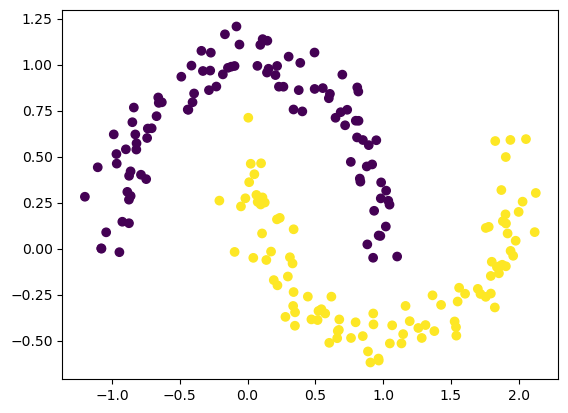

In [18]:
plt.scatter( X[:,0] , X[:,1] , c = y )

# Implementation

In [21]:
X

array([[-1.04367864e+00,  8.86576137e-02],
       [ 9.19419335e-01,  4.57562308e-01],
       [ 6.49113625e-01,  7.11094620e-01],
       [ 1.19669356e+00, -3.94259482e-01],
       [ 2.97282827e-01, -1.51585050e-01],
       [ 2.37633029e-01,  1.67082796e-01],
       [-6.59314583e-01,  8.21496497e-01],
       [ 1.56120076e+00, -2.12677206e-01],
       [ 1.85506933e+00, -1.34071124e-01],
       [ 1.43137829e-01,  9.56922905e-01],
       [-4.41582194e-01,  7.55966785e-01],
       [ 1.90625366e+00, -9.59995754e-02],
       [ 1.52812041e+00, -3.95937727e-01],
       [-8.20996891e-01,  5.38462873e-01],
       [ 1.88400141e+00,  1.49120426e-01],
       [ 1.85999190e+00, -9.54072752e-02],
       [-8.20568809e-02,  1.20732709e+00],
       [ 1.05004577e+00, -5.15382780e-01],
       [-9.87587144e-01,  6.20842845e-01],
       [-4.36974351e-01,  7.54526701e-01],
       [ 3.31853638e-01, -8.05426398e-02],
       [ 8.94215321e-01,  5.62462865e-01],
       [ 9.68153055e-01, -6.08384279e-01],
       [-8.

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc

array([[-1.76430775, -0.35182784],
       [ 0.47395423,  0.38602031],
       [ 0.16576024,  0.89311157],
       [ 0.79009351, -1.31771278],
       [-0.23538606, -0.83233841],
       [-0.30339687, -0.19496924],
       [-1.32606806,  1.11392693],
       [ 1.20569304, -0.95452915],
       [ 1.54075265, -0.79730872],
       [-0.41113729,  1.38479398],
       [-1.0778165 ,  0.98286062],
       [ 1.59911139, -0.72116162],
       [ 1.16797588, -1.32106945],
       [-1.51041309,  0.54782994],
       [ 1.57374008, -0.23089586],
       [ 1.54636521, -0.71997696],
       [-0.66789715,  1.88562866],
       [ 0.62289035, -1.5599721 ],
       [-1.70035401,  0.71259854],
       [-1.07256278,  0.9799803 ],
       [-0.19596952, -0.69024613],
       [ 0.44521742,  0.59583245],
       [ 0.52951887, -1.74598487],
       [-1.58622349,  0.08790154],
       [-1.03743605,  1.06202843],
       [-1.02433339,  1.15746081],
       [-1.50874912,  0.61567092],
       [-1.13190552,  1.33969306],
       [-0.32300276,

# DBSCAN

In [36]:
db = DBSCAN(eps=0.3,min_samples=7)
db.fit(X_sc)

DBSCAN(eps=0.3, min_samples=7)

In [38]:
db.labels_

array([-1,  0,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,
        1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  0,  0, -1,  0,  0,  1, -1,  0,  0,  1,  0,  1,
        1,  0,  1,  1,  0,  1, -1,  1, -1,  1,  0,  0,  0,  0,  1,  0,  1,
        0,  1,  0,  1,  1,  0,  1,  1,  0,  1, -1,  1,  0,  0,  0,  1,  1,
        0,  1,  0,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  0,  0,
        1,  1,  1,  1,  0,  0,  1,  1,  1,  0, -1,  1,  0,  1,  0,  0,  1,
        0,  0,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,  0,  1,
        0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,
        0,  0,  0,  1,  1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  0,  1,  0,
        0,  0,  0,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,  1,  1, -1,
        1,  0,  0,  1, -1,  0,  1,  0,  1,  0, -1,  1,  1], dtype=int64)

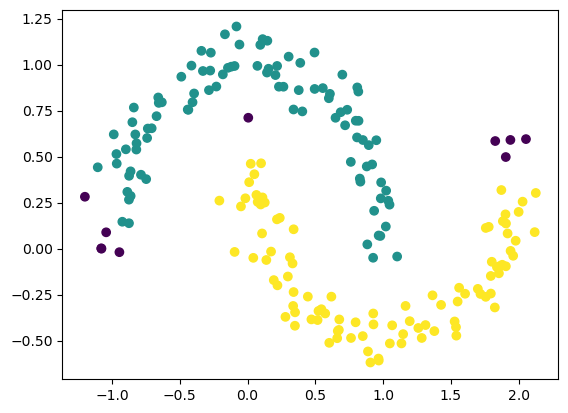

In [40]:
plt.scatter( X[:,0] , X[:,1] , c = db.labels_ )